# Predict house prices using:
**1)Linear Regression**

**2)Ridge Regression**

**3)Lasso Regression**

**4)Compare performance**

**5)Plot learning curve**

# **Step 1: Libraries**

In [ ]:
import pandas as pd

# Dataset load
df = pd.read_csv("housing.csv")

# Top 5 rows
print(df.head())

# Columns summary
print(df.info())




   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

 # Step 2: Load the dataset

In [ ]:
# Null values check
print(df.isnull().sum())

# Unimportant columns (e.g., ID)
df = df.drop(columns=["id"], errors='ignore')

# NaN rows
df = df.dropna()

# Target column: 'price'or 'SalePrice'
print(df.columns)


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64
Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


#  Step 3: Clean the dataset

In [ ]:
# X = input features, y = price
X = df.drop("Price", axis=1)  # ya "SalePrice"
y = df["Price"]               # target

from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Train-Test Split

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is already loaded and cleaned as in your notebook

# Check the data types before splitting
# print(df.info())

# Drop any non-numerical columns that are not the target or features
# Based on the error, a column containing addresses needs to be removed.
# Let's assume the column is named 'Address' based on the error content.
# You might need to adjust the column name based on your actual data.
if 'Address' in df.columns:
    df = df.drop(columns=['Address'])

# X = input features, y = price
# Make sure 'Price' or 'SalePrice' exists after dropping columns
# print(df.columns) # Check columns again if unsure

# Assuming 'Price' is the correct target column name based on your comment
X = df.drop("Price", axis=1)
y = df["Price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now apply the scaler to the numerical data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Feature Scaling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R²: 0.9179971706985147
MSE: 10089009299.50155


# Step 6: Train Models

In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate
print("Ridge R²:", r2_score(y_test, y_pred_ridge))
print("Lasso R²:", r2_score(y_test, y_pred_lasso))


Ridge R²: 0.9179972203779351
Lasso R²: 0.91799718426132


# Step 7: Evaluation and Learning Curves (for linear Regression)

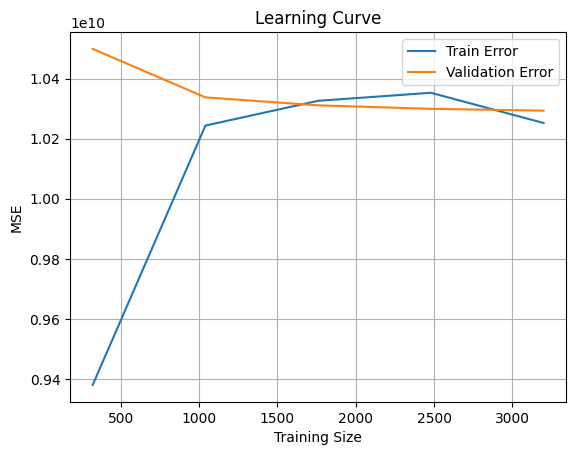

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train Error')
plt.plot(train_sizes, test_mean, label='Validation Error')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curve')
plt.grid()
plt.show()

# Visual Check — Actual vs Predicted

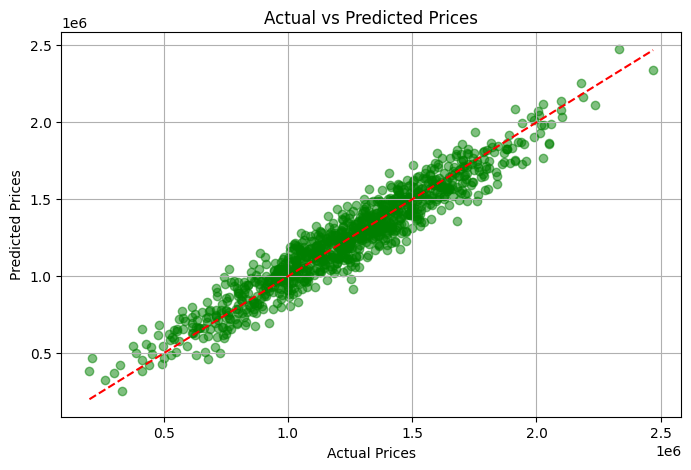

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


# Compare Ridge & Lasso

In [ ]:
print("Ridge R²:", r2_score(y_test, y_pred_ridge))
print("Lasso R²:", r2_score(y_test, y_pred_lasso))


Ridge R²: 0.9179972203779351
Lasso R²: 0.91799718426132


In [ ]:
sample = X_test_scaled[5].reshape(1, -1)
pred_price = lr.predict(sample)
print("Predicted Price:", pred_price[0])
print("Actual Price:", y_test.iloc[5])


Predicted Price: 1544058.0505011852
Actual Price: 1555320.5


# Gradio App

In [ ]:
import gradio as gr
import numpy as np
import pandas as pd

# 🧠 Already trained model and scaler required:
# Make sure `lr` (LinearRegression model) and `scaler` are trained

# 🧾 Define feature names (based on your dataset)
feature_names = X.columns.tolist()  # e.g., ['area', 'bedrooms', 'bathrooms']

# 🧠 Prediction function
def predict_price(*inputs):
    input_array = np.array(inputs).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = lr.predict(input_scaled)[0]
    return f"💰 Estimated House Price: {round(prediction):,} PKR"

# 🎨 Create input components dynamically
input_components = [gr.Number(label=feature) for feature in feature_names]

# 🖼️ Gradio Interface
gr.Interface(
    fn=predict_price,
    inputs=input_components,
    outputs=gr.Textbox(),
    title="🏠 House Price Predictor",
    description="Enter house details and get an estimated price prediction",
    theme="default"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1d43bfec74c9e7ed71.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
